# Machine Learning Foundation
## K-Means Clustering

### K-Means Overview

In [44]:
# setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats=['retina']
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize']=[6,6]
sns.set_style('whitegrid')
sns.set_context('talk')

### Cluster starting points

In [4]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    color='brgcmyk'
    alpha=0.5
    s=20
    if num_clusters==0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i, 0], X[km.labels_==i, 1], c=color[i], alpha=alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)

In [36]:
angle=np.linspace(0, 2*np.pi, 20, endpoint=False)
X=np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()

In [37]:
X

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

In [39]:
# X=list(zip(np.cos(angle),np.sin(angle)))
# X=np.array(X)
# X

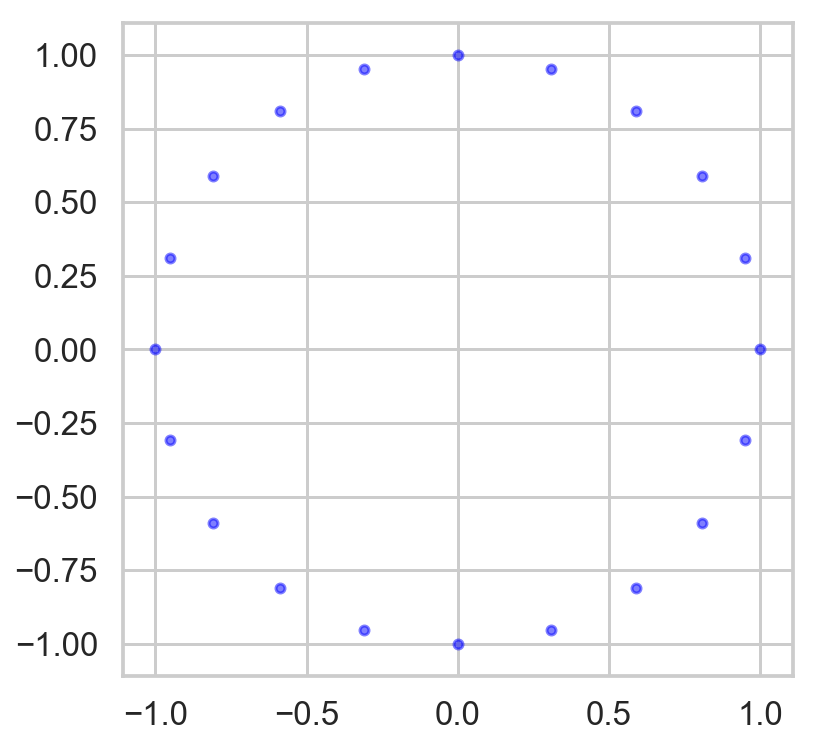

In [40]:
display_cluster(X)

Clustering with a random state of 10

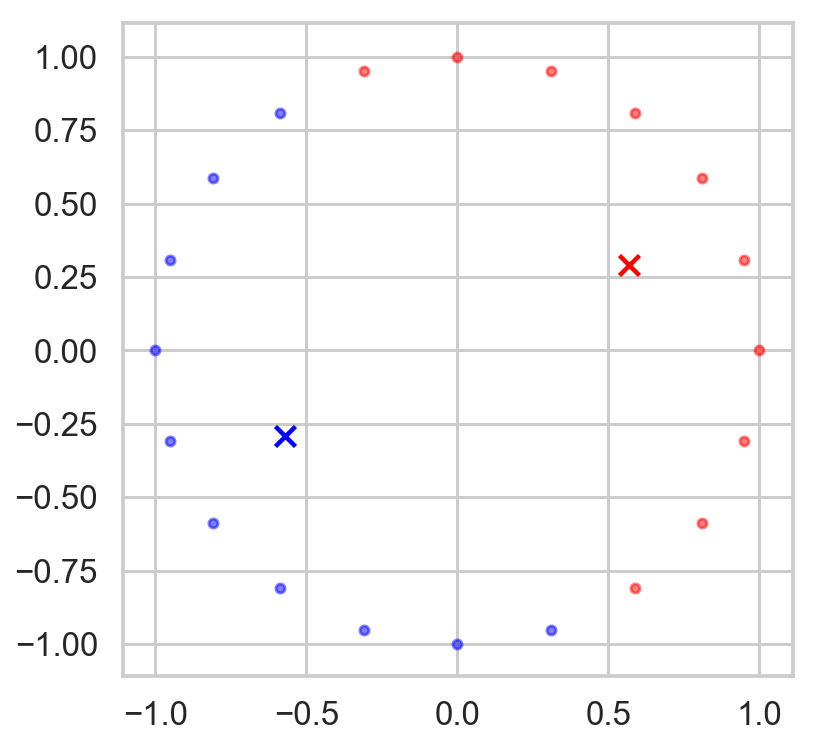

In [45]:
num_clusters=2
km=KMeans(n_clusters=num_clusters, random_state=10, n_init=1)
km.fit(X)
display_cluster(X, km, num_clusters)

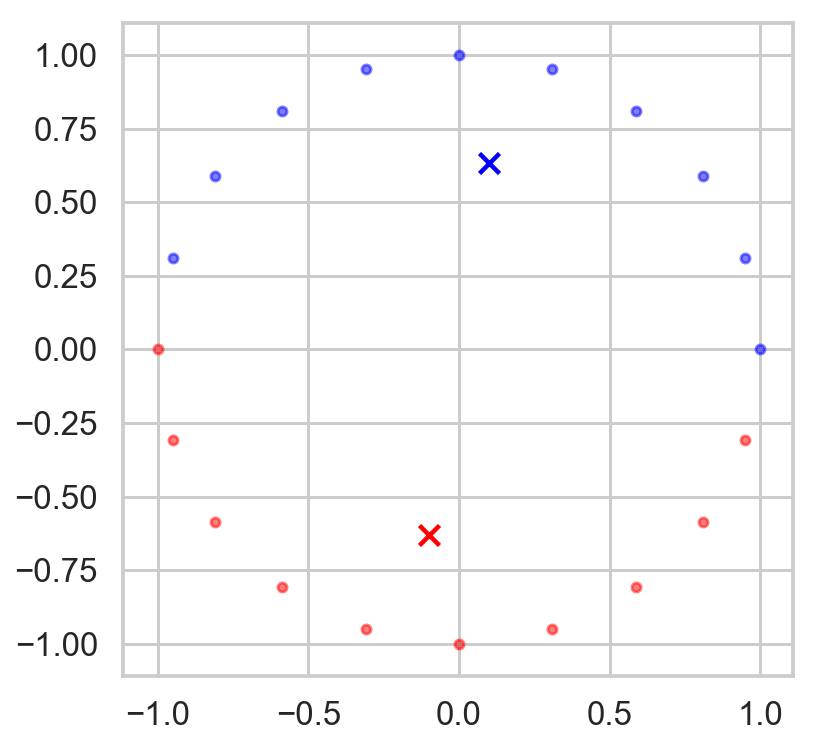

In [46]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

### Determine optimum number of clusters

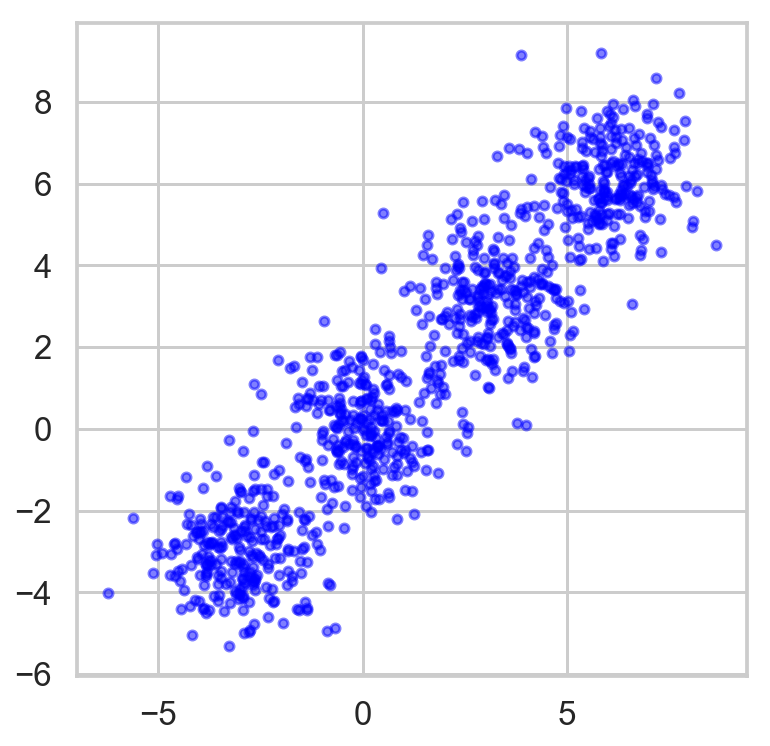

In [49]:
n_samples=1000
n_bins=4
centers=[(-3,-3),(0,0),(3,3),(6,6)]
X,y=make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
               centers=centers, shuffle=False, random_state=42)
display_cluster(X)

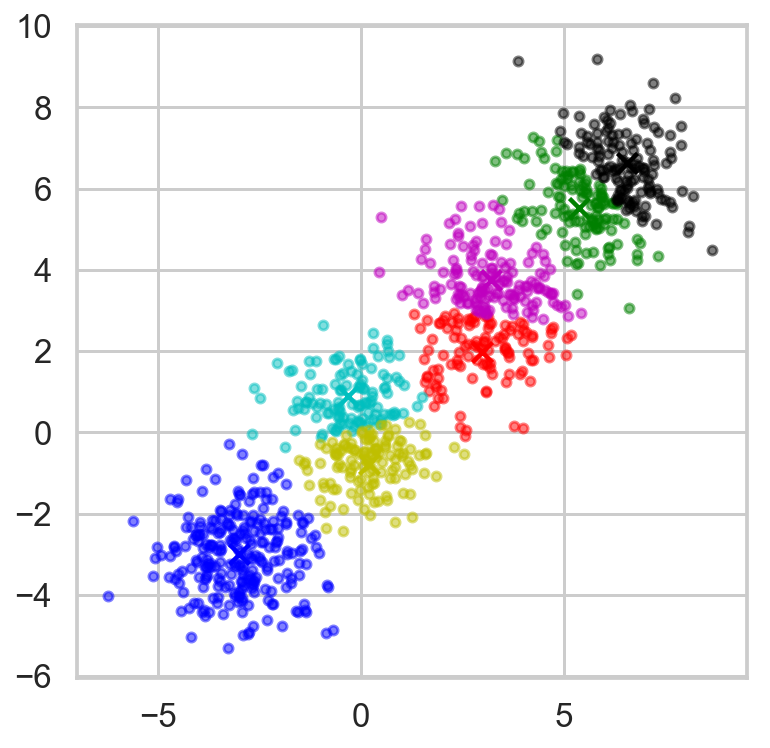

In [52]:
num_clusters=7
km=KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X, km, num_clusters)

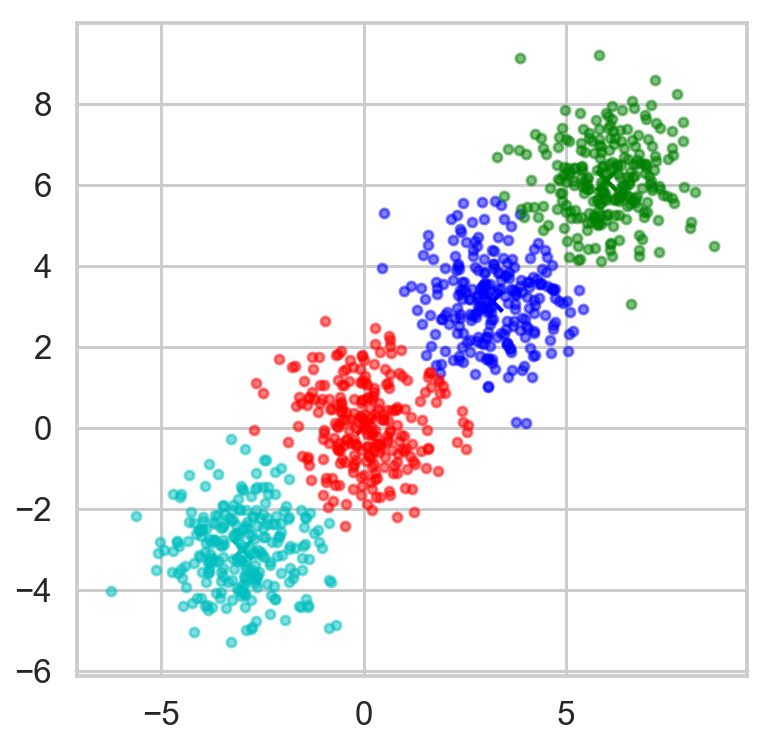

In [54]:
num_clusters=4
km=KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X, km, num_clusters)

In [55]:
km.inertia_

1880.174402277563

We calculates inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters

In [58]:
inertias=[]

for i in range(10):
    num_clusters=i+1
    km=KMeans(n_clusters=num_clusters)
    km.fit(X)

    inertias.append(km.inertia_)

In [59]:
inertias

[24686.430919101414,
 6350.866774399324,
 3661.5364281719976,
 1880.174402277563,
 1679.7196777675845,
 1501.4230092047428,
 1348.317692219524,
 1208.0681590966828,
 1081.0391161144235,
 964.6282444043659]

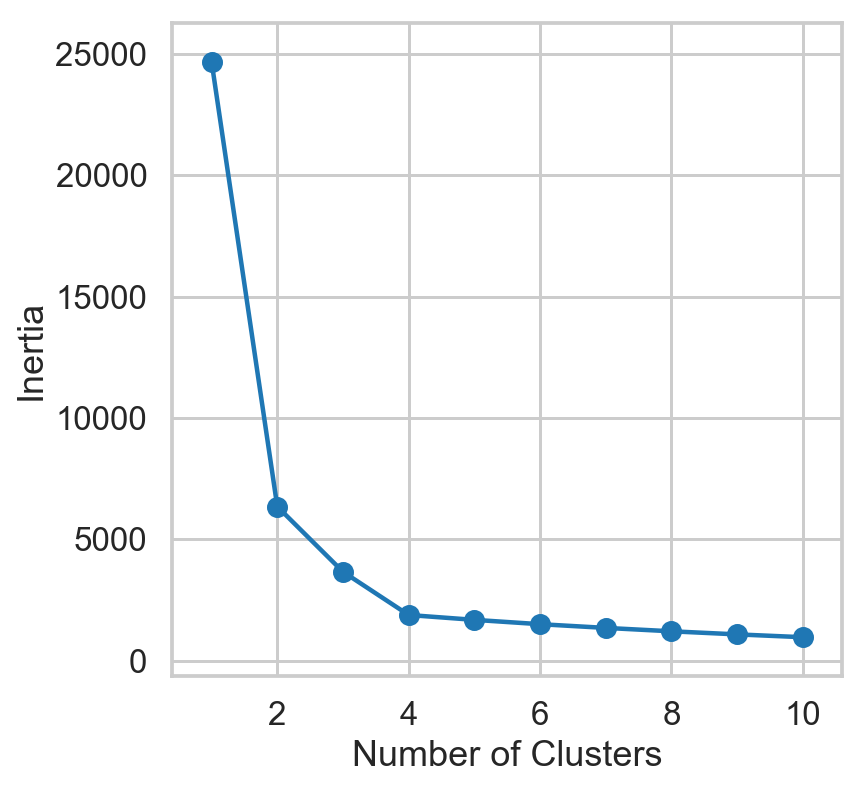

In [66]:
plt.plot(range(1,11),inertias)
plt.scatter(range(1,11),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

### Clustering colors from an image

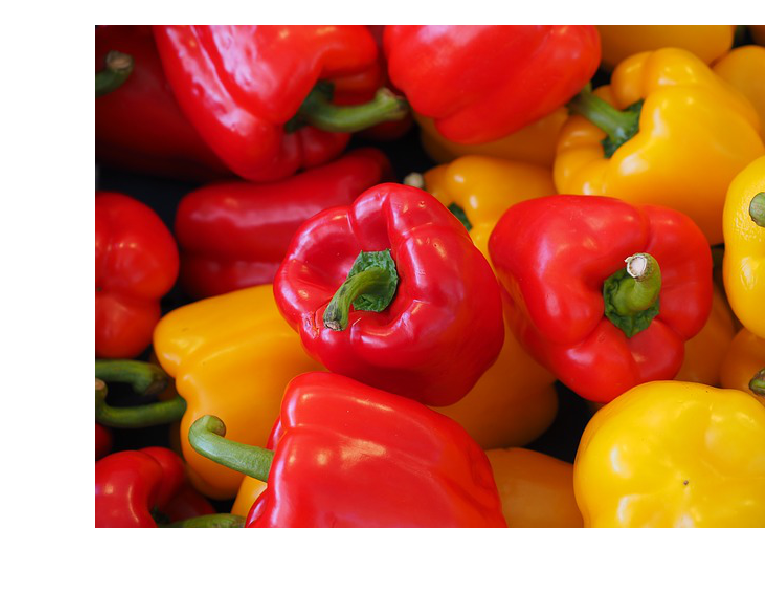

In [105]:
img=plt.imread('data/peppers.jpg')
plt.imshow(img)
plt.axis('off');

In [72]:
img.shape

(480, 640, 3)

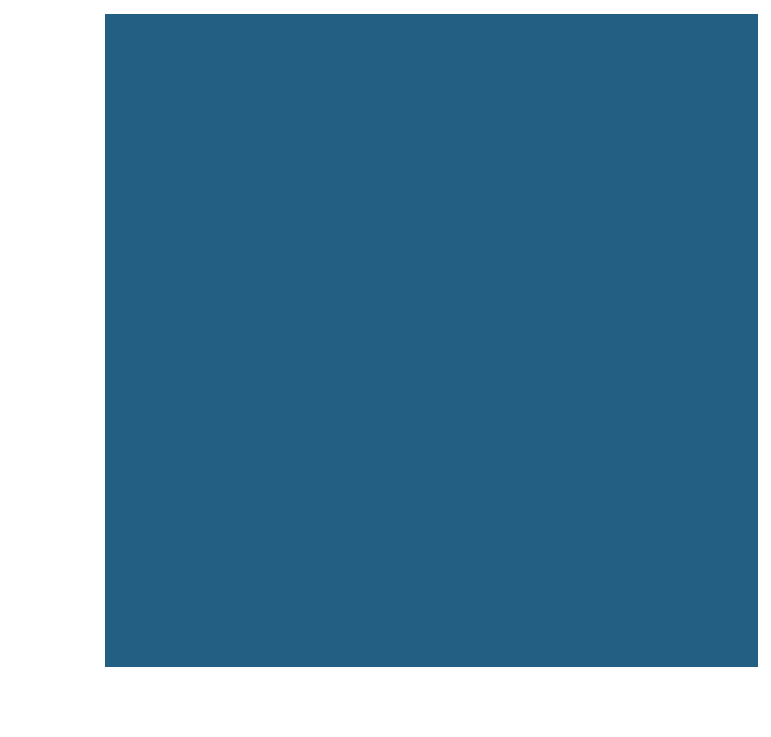

In [75]:
# assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off');

First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.

In [78]:
img_flat=img.reshape(img.shape[0]*img.shape[1],-1)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

In [80]:
img_flat.shape

(307200, 3)

In [81]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

Now let's replace each row with its closest cluster center.

In [86]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

We now need to reshape the the data from 307,200 x 3 to 480 x 640 x 3

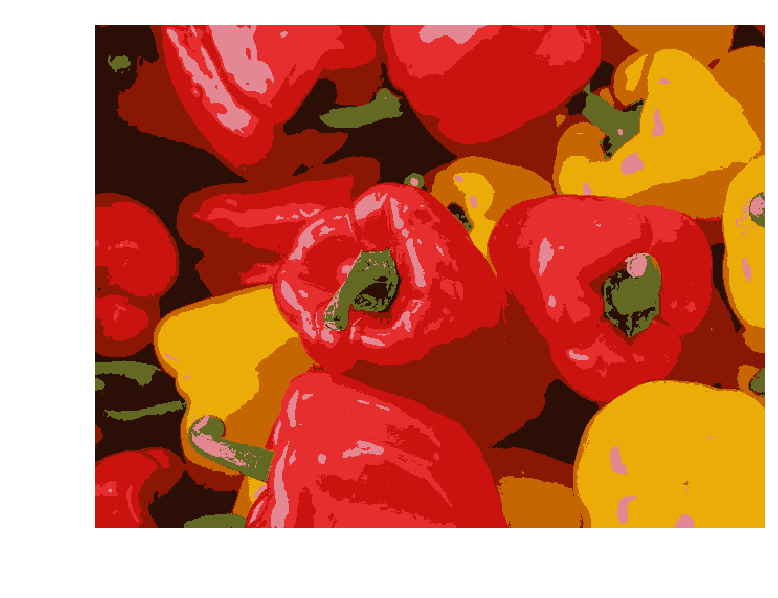

In [87]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

Write a function that receives the image and the number of clusters(k), and returns the image quantized into k colors and the inertia.

In [90]:
def img_compress(img, num_clusters):
    img_flat=img.reshape(-1, 3)
    kmeans=KMeans(n_clusters=num_clusters, random_state=0).fit(img_flat)
    img_flat2=img_flat.copy()
    
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

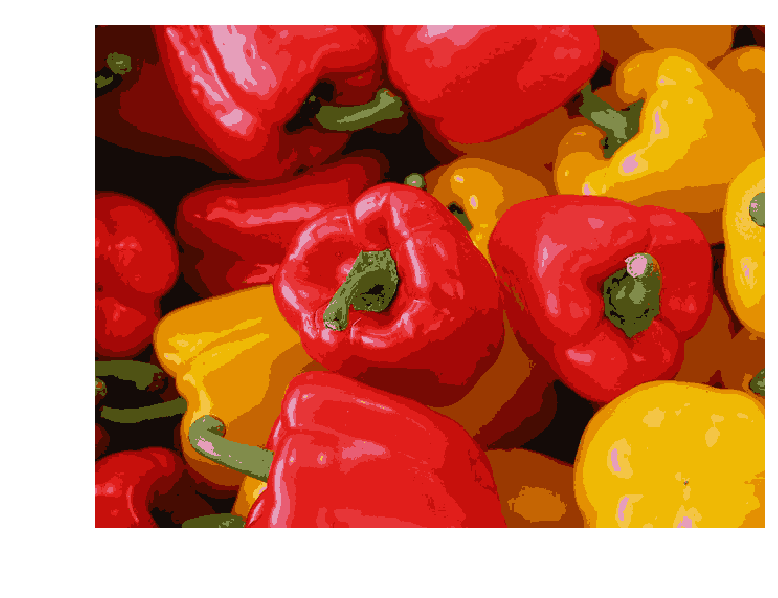

In [91]:
comp_img, _=img_compress(img, 16)
plt.imshow(comp_img)
plt.axis('off');

Call the fucntion for k between 2 and 20, and draw an inertia curve 

In [106]:
img

array([[[ 15,  18,  25],
        [ 26,  16,  24],
        [ 42,  15,  22],
        ...,
        [129,  48,   1],
        [132,  50,   2],
        [134,  50,   3]],

       [[ 24,  17,  25],
        [ 30,  15,  22],
        [ 45,  12,  19],
        ...,
        [123,  45,   0],
        [127,  46,   0],
        [129,  47,   0]],

       [[ 36,  15,  24],
        [ 42,  12,  20],
        [ 52,  11,  17],
        ...,
        [119,  42,   0],
        [122,  43,   0],
        [123,  44,   1]],

       ...,

       [[182,  18,  27],
        [183,  19,  28],
        [184,  20,  29],
        ...,
        [207, 156,   3],
        [207, 156,   3],
        [207, 156,   3]],

       [[182,  18,  27],
        [184,  20,  29],
        [185,  21,  30],
        ...,
        [206, 155,   2],
        [206, 155,   2],
        [206, 155,   2]],

       [[184,  20,  29],
        [186,  22,  31],
        [186,  22,  33],
        ...,
        [205, 154,   1],
        [205, 154,   3],
        [206, 155,   4]]

In [107]:
k_vals=list(range(2, 21, 2))
img_list=[]
inertias=[]
for i in k_vals:
    print(i)
    img2, inertia=img_compress(img, i)
    img_list.append(img2)
    inertias.append(inertia)

2
4
6
8
10
12
14
16
18
20


In [108]:
inertias

[1606794749.6643853,
 650428733.9426337,
 414248116.59198576,
 296786157.3721209,
 230465500.71247822,
 188438786.94549417,
 158187612.69535348,
 136773353.37977973,
 120141158.89687541,
 106390752.39694194]

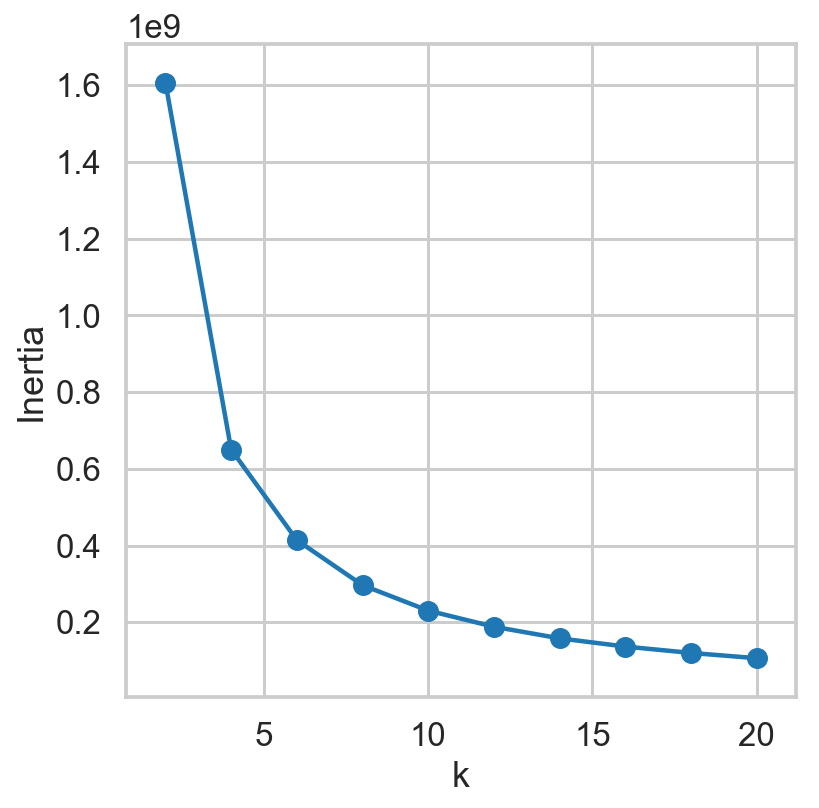

In [109]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertias)
plt.scatter(k_vals,inertias)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

Plot in a grid all the images for the different k values

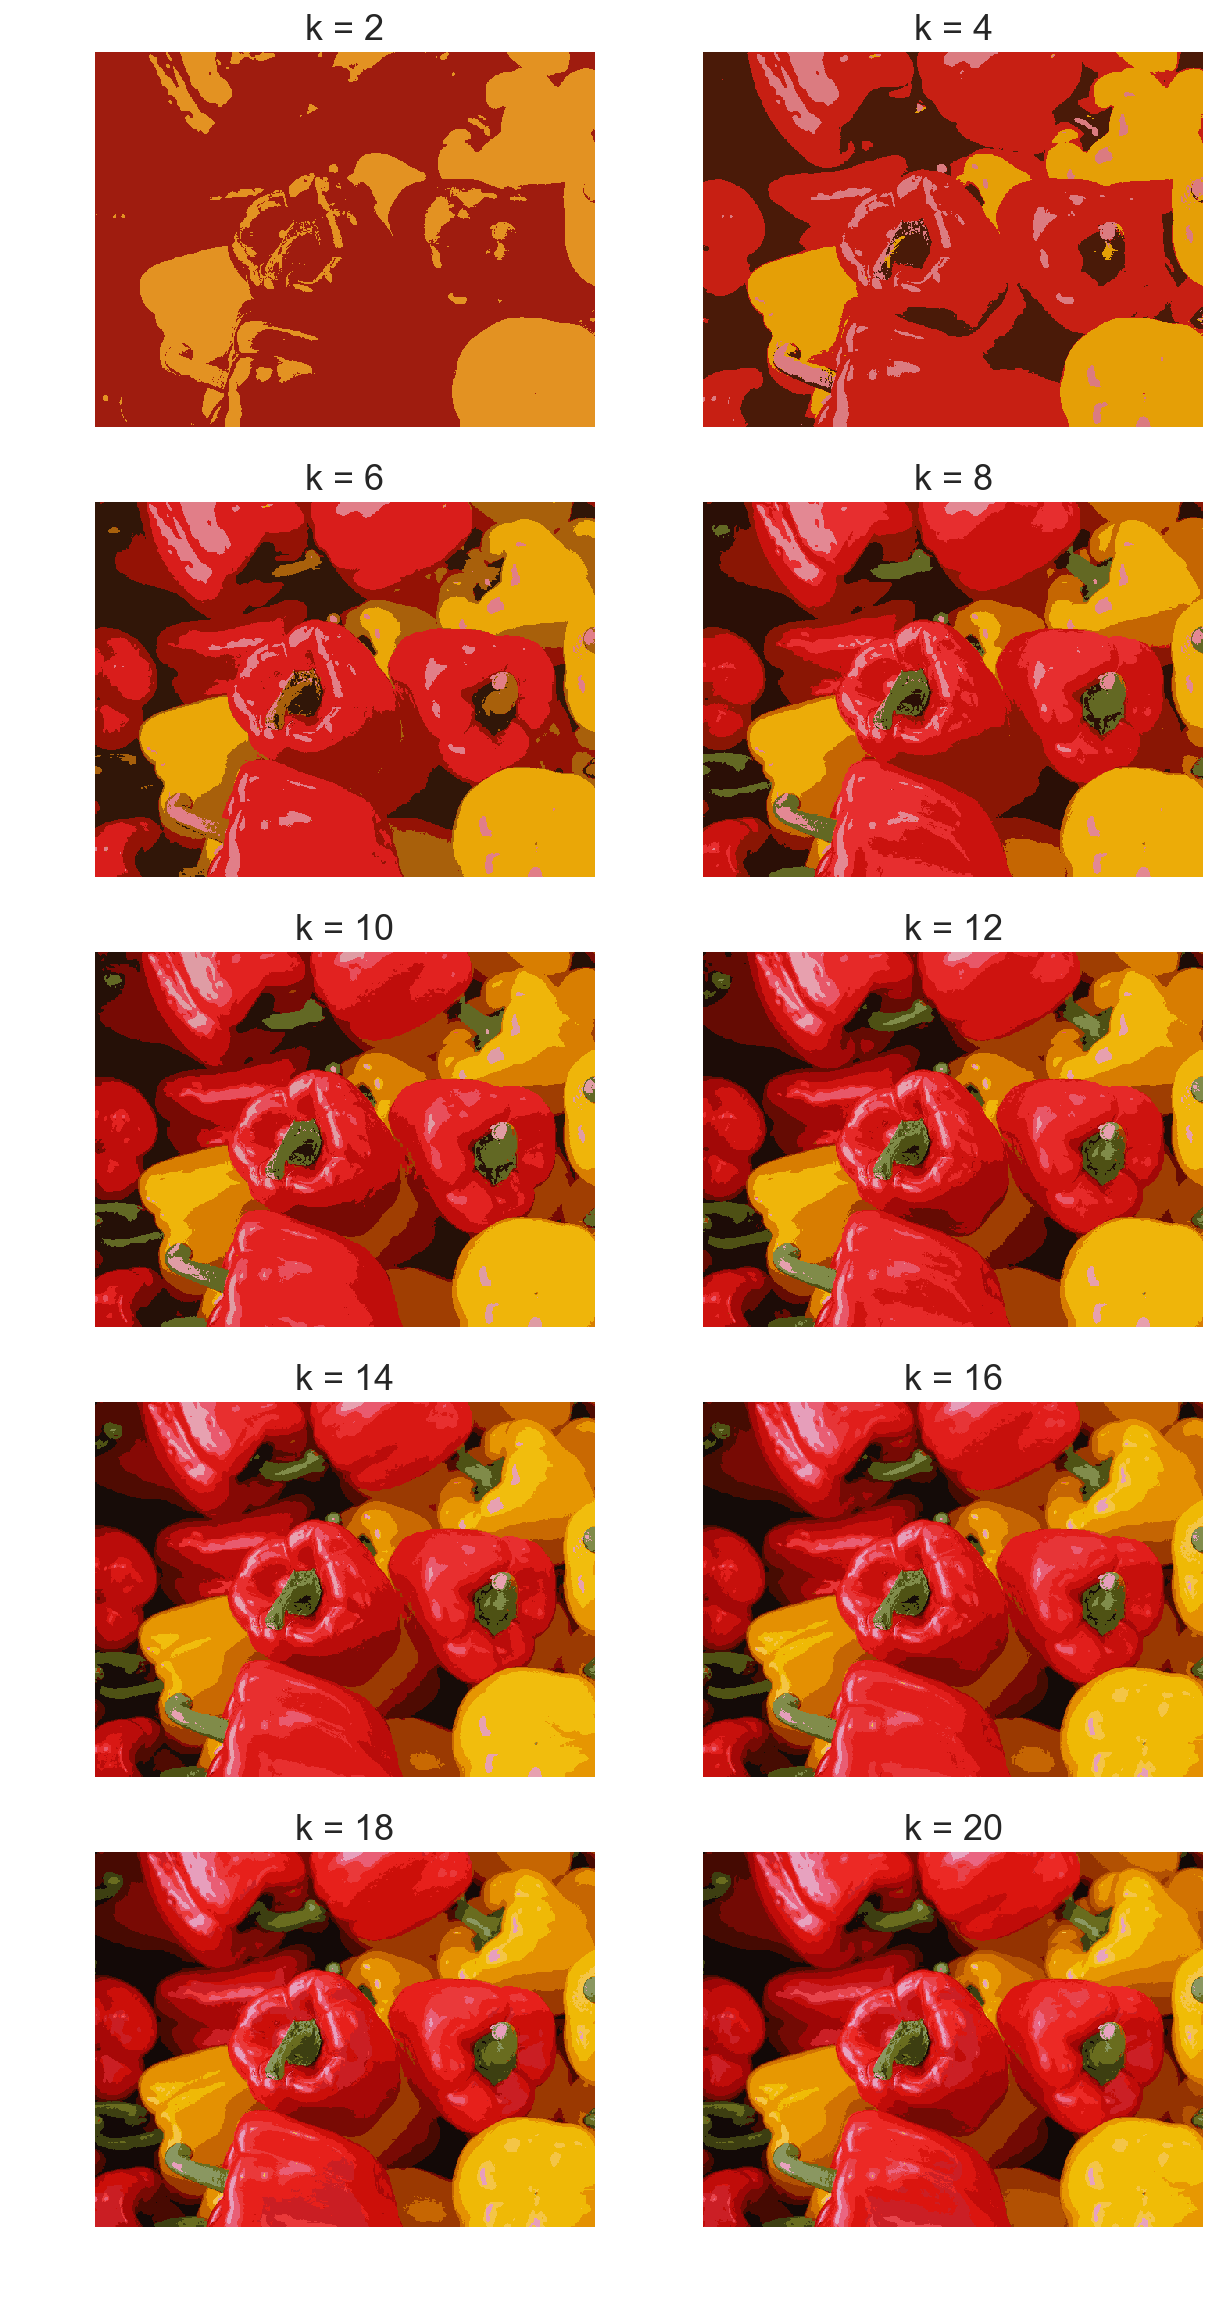

In [110]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION